# AccelerateAI - Data Science Global Bootcamp

### Reularized Regression - For Variable Selection

##### The regularized Linear Regression techniques for feature selection as well as avoiding overfit in linear regression. 
- Lasso
- Ridge 
- ElasticNet 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.datasets import make_regression

In [22]:
# Create a synthetic data using make_regression
X,y = make_regression(n_features=4, n_samples=20, noise=1)

In [23]:
X_new = pd.DataFrame(X)
X_new.head()

,0,1,2,3
0,1.178690,0.593096,0.464431,-0.840697
1,-0.543265,0.601259,1.753593,0.043774
2,-1.013758,0.106946,-2.222882,-0.043008
3,-2.334185,-0.886827,-1.633101,0.202251
4,0.906195,0.028679,-0.268049,1.540924


In [24]:
# creating 4 random variables 
randomVar_1 = np.random.uniform(low=-1, high=1, size=20)
randomVar_2 = np.random.uniform(low=-1, high=1, size=20)
randomVar_3 = np.random.uniform(low=-1, high=1, size=20)
randomVar_4 = np.random.uniform(low=-1, high=1, size=20)

In [25]:
print(randomVar_1)

[ 0.39159552 -0.61809344  0.36761     0.56192036  0.49407723  0.36862073
 -0.29566271  0.92370018  0.86659339 -0.87055173 -0.8024196   0.15951769
 -0.22738946  0.77151755 -0.86816428  0.10423573 -0.99578341  0.42195214
  0.34283144 -0.53679694]


In [26]:
# append them to the independent variables list 
X_new["rv1"] = randomVar_1
X_new["rv2"] = randomVar_2
X_new["rv3"] = randomVar_3
X_new["rv4"] = randomVar_4

In [27]:
X_new.head()

,0,1,2,3,rv1,rv2,rv3,rv4
0,1.178690,0.593096,0.464431,-0.840697,0.391596,0.399756,-0.730386,-0.746340
1,-0.543265,0.601259,1.753593,0.043774,-0.618093,0.883054,-0.753855,0.494408
2,-1.013758,0.106946,-2.222882,-0.043008,0.367610,0.252102,-0.832180,-0.553606
3,-2.334185,-0.886827,-1.633101,0.202251,0.561920,-0.463852,0.029034,0.396283
4,0.906195,0.028679,-0.268049,1.540924,0.494077,-0.400245,0.367197,-0.972404


<AxesSubplot:>

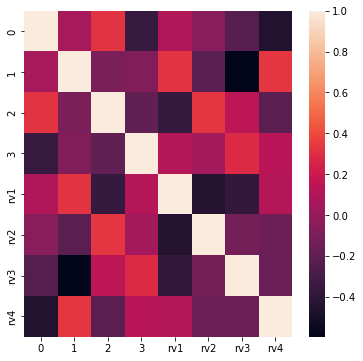

In [28]:
import seaborn as sn; 

# Compute the correlation matrix
corr = X_new.corr()

# Set up the matplotlib figure
plt.subplots(figsize=(6, 6))

# Draw the heatmap
sn.heatmap(corr) 

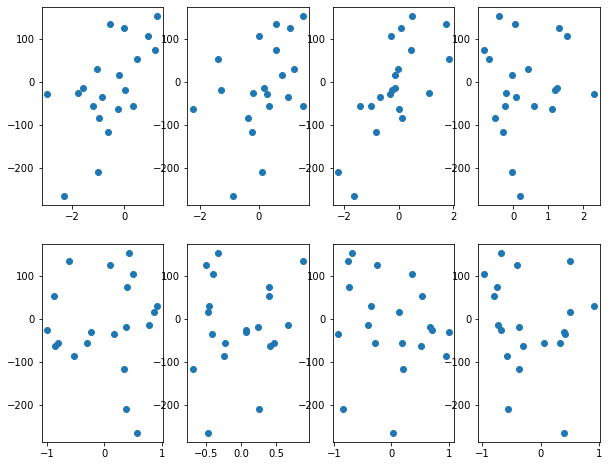

In [29]:
# check the scatterplot for any relationship 
fig = plt.figure(1, figsize=(10,8))
columns = 4
rows = 2

for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.scatter(X_new.iloc[:,i-1], y)

plt.show()

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr_model = LinearRegression()
ri_model = Ridge(alpha=1.0)
la_model = Lasso(alpha=1.0)
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [31]:
# train the models with the synthetic data 
lr_model.fit(X_new, y)
ri_model.fit(X_new, y)
la_model.fit(X_new, y)
en_model.fit(X_new, y)

ElasticNet()

In [32]:
# collect all coefficients in a pandas dataframe
coeff = {"Linear": lr_model.coef_, 
         "Ridge": ri_model.coef_, 
         "Lasso": la_model.coef_, 
         "ElasticNet": en_model.coef_}
df_coeff = pd.DataFrame(coeff)

In [33]:
#displaying the DataFrame
#from tabulate import tabulate
#print(tabulate(df_coeff, headers = 'keys', tablefmt = 'fancy_grid'))
df_coeff

,Linear,Ridge,Lasso,ElasticNet
0,47.646175,45.426930,46.683884,33.243871
1,49.397308,46.478832,48.561943,29.437527
2,74.271164,70.061486,72.943230,47.323639
3,53.193468,47.265720,50.490302,21.883645
4,-0.917029,0.328328,0.000000,0.092062
5,-1.432717,1.070605,0.000000,2.266432
6,-1.428213,-1.095057,-0.000000,-2.613221
7,-0.067410,-0.555645,-0.000000,-1.527626


In [34]:
# Try with some other values of alpha

ri_model = Ridge(alpha=0.1)
en_model = ElasticNet(alpha=0.1, l1_ratio=0.8)

ri_model.fit(X_new, y)
en_model.fit(X_new, y)

ElasticNet(alpha=0.1, l1_ratio=0.8)

In [35]:
# collect all coefficients in a pandas dataframe
coeff = {"Linear": lr_model.coef_, 
         "Ridge": ri_model.coef_, 
         "Lasso": la_model.coef_, 
         "ElasticNet": en_model.coef_}
df_coeff = pd.DataFrame(coeff)
# displaying the DataFramepip install 
from tabulate import tabulate
print(tabulate(df_coeff, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════╤═══════════╤═════════╤══════════════╕
│    │     Linear │     Ridge │   Lasso │   ElasticNet │
╞════╪════════════╪═══════════╪═════════╪══════════════╡
│  0 │ 47.6462    │ 47.4192   │ 46.6839 │    46.7267   │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  1 │ 49.3973    │ 49.1191   │ 48.5619 │    48.1997   │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  2 │ 74.2712    │ 73.8067   │ 72.9432 │    72.3963   │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  3 │ 53.1935    │ 52.5155   │ 50.4903 │    50.3581   │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  4 │ -0.917029  │ -0.701022 │  0      │    -0        │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  5 │ -1.43272   │ -1.00825  │  0      │     0        │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  6 │ -1.42821   │ -1.28583  │ -0      │    -0.673583 │
├────┼────────────┼───────────┼─────────┼──────────────┤
│  7 │ -0.0674104 │ -0.107245 │

In [36]:
# Cross validation can be used to get the best value of alpha.

from sklearn.linear_model import ElasticNetCV

enCV_model = ElasticNetCV(cv=5, random_state=0)
enCV_model.fit(X_new, y)

print("Best Alpha:", enCV_model.alpha_ )
print("Model Coefficients:", enCV_model.coef_)

Best Alpha: 0.15222879589572394
Model Coefficients: [44.37277195 44.91978738 68.02833503 44.55217179  0.35887046  1.35388224
 -1.15988159 -0.5442876 ]


In [37]:
# How much does the coefficients shrink in Lasso? 

la_model = Lasso(alpha=1000)   #100, 1000 , 10,000
la_model.fit(X_new, y)

print("Model Coefficients:", la_model.coef_)

Model Coefficients: [ 0.  0.  0.  0. -0.  0. -0. -0.]
